In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as sm_tstat
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Bolshakov.xlsx")
s1 = df["lomur"][:-3]
s2 = df["metspbex"][:-3]
s3 = df["metnovex"][:-3]

s1_test = df["lomur"][-3:]
s2_test = df["metspbex"][-3:]
s3_test = df["metnovex"][-3:]

In [3]:
def plot(series):
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(series)), series)

In [4]:
def plot_Acorr_PAcorr(dataset, Acorr_lags, PAcorr_lags):
    fig = plt.figure(figsize=(13, 10))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dataset, lags=Acorr_lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dataset, lags=PAcorr_lags, ax=ax2)
    plt.show()

# Определение порядка интегрированности рядов и преобразование их к стационарным

## Проверим ряд s1 на наличие тренда

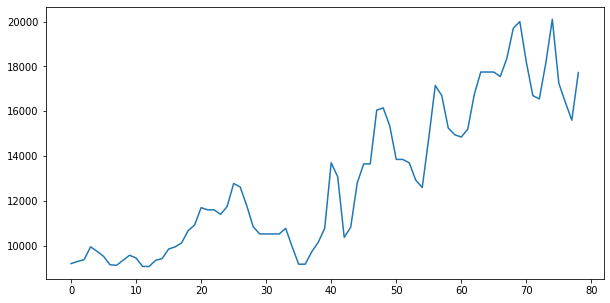

In [5]:
plot(s1)

In [6]:
test_s1_ct = sm_tstat.adfuller(s1, regression='ct', regresults=True)
test_s1_ct[3].__dict__["resols"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     8.521
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.13e-05
Time:                        02:07:17   Log-Likelihood:                -620.60
No. Observations:                  76   AIC:                             1251.
Df Residuals:                      71   BIC:                             1263.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2385      0.082     -2.911      0.005      -0.402      -0.075
x2             0.4059      0.107      3.779      0.000       0.192       0.620
x3            -0.3229      0.116     -2.778      0.007      -0.555      -0.091
const       1946.2957    673.518      2.890      0.005     603.340    3289.252
x4            32.7224     11.736      2.788      0.007       9.322      56.123
==============================================================================
Omnibus:                        4.087   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                4.843
Skew:                           0.015   Prob(JB):                       0.0888
Kurtosis:                       4.236   Cond. No.                     8.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Коэффициент x4 достаточно мал, поэтому отвергаем гипотезу о нулевом тренде. Тренд обнаружен, берем разности, чтобы детрендировать ряд.

In [7]:
s1_diff = s1.diff(1).dropna()

test_s1_diff_c = sm_tstat.adfuller(s1_diff, regression='c', regresults=True)
test_s1_diff_c[3].__dict__["resols"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     26.87
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.01e-11
Time:                        02:07:17   Log-Likelihood:                -615.75
No. Observations:                  75   AIC:                             1239.
Df Residuals:                      71   BIC:                             1249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.3779      0.190     -7.247      0.000      -1.757      -0.999
x2             0.6071      0.135      4.501      0.000       0.338       0.876
x3             0.1924      0.121      1.591      0.116      -0.049       0.434
const        144.5506    107.154      1.349      0.182     -69.108     358.209
==============================================================================
Omnibus:                       13.281   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.573
Skew:                           0.583   Prob(JB):                     4.61e-06
Kurtosis:                       5.551   Cond. No.                     1.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Для const видим pvalue выше 0.05. Тогда используем для теста параметр regression="nc"

In [8]:
test_s1_diff_nc = sm_tstat.adfuller(s1_diff, regression='nc', regresults=True)

print('Augmented Dickey-Fuller Test Results: ', test_s1_diff_nc[0])
print('p-value: ', test_s1_diff_nc[1])
print('Critical values: ', test_s1_diff_nc[2])

Augmented Dickey-Fuller Test Results:  -8.586672064716813
p-value:  1.5011331894519598e-14
Critical values:  {'1%': -2.595786364265928, '5%': -1.945045666733489, '10%': -1.613737358579968}


### Значения теста Дики-Фуллера указывают на то, что ряд первых разностей стационарен

## Проверим ряд s2 на наличие тренда

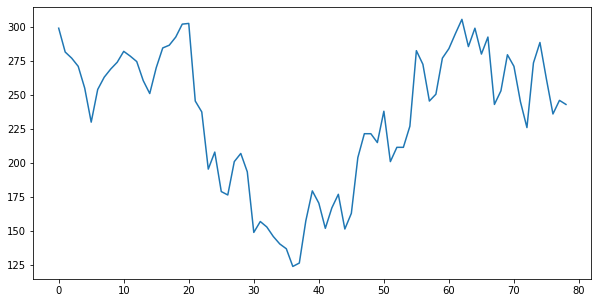

In [9]:
plot(s2)

In [10]:
test_s2_ct = sm_tstat.adfuller(s2, regression='ct', regresults=True)
test_s2_ct[3].__dict__["resols"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.378
Date:                Wed, 20 May 2020   Prob (F-statistic):             0.0997
Time:                        02:07:17   Log-Likelihood:                -345.10
No. Observations:                  78   AIC:                             696.2
Df Residuals:                      75   BIC:                             703.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0938      0.046     -2.057      0.043      -0.185      -0.003
const         18.0862     11.586      1.561      0.123      -4.995      41.167
x2             0.0778      0.104      0.751      0.455      -0.129       0.284
==============================================================================
Omnibus:                        1.007   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.620
Skew:                          -0.209   Prob(JB):                        0.734
Kurtosis:                       3.129   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### p-value параметра x2 говорит об отсутствии тренда

In [11]:
test_s2_c = sm_tstat.adfuller(s2, regression='c', regresults=True)
test_s2_c[3].__dict__["resols"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     4.216
Date:                Wed, 20 May 2020   Prob (F-statistic):             0.0435
Time:                        02:07:17   Log-Likelihood:                -345.39
No. Observations:                  78   AIC:                             694.8
Df Residuals:                      76   BIC:                             699.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0933      0.045     -2.053      0.043      -0.184      -0.003
const         21.0585     10.858      1.940      0.056      -0.566      42.683
==============================================================================
Omnibus:                        0.971   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                0.483
Skew:                          -0.148   Prob(JB):                        0.786
Kurtosis:                       3.247   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### p-value для const не превышает 0.05. Константа значима. Посмотрим на результаты теста Дики-Фуллера

In [12]:
print('Augmented Dickey-Fuller Test Results: ', test_s2_c[0])
print('p-value: ', test_s2_c[1])
print('Critical values: ', test_s2_c[2])

Augmented Dickey-Fuller Test Results:  -2.0532894832642326
p-value:  0.2637069038432409
Critical values:  {'1%': -3.517113604831504, '5%': -2.8993754262546574, '10%': -2.5869547797501644}


### p-value велико, критические значения превышены. Нужно брать разности

In [13]:
s2_diff = s2.diff(1).dropna()

test_s2_diff_c = sm_tstat.adfuller(s2_diff, regression='c', regresults=True)
test_s2_diff_c[3].__dict__["resols"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     38.78
Date:                Wed, 20 May 2020   Prob (F-statistic):           3.34e-12
Time:                        02:07:17   Log-Likelihood:                -337.89
No. Observations:                  76   AIC:                             681.8
Df Residuals:                      73   BIC:                             688.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1800      0.162     -7.295      0.000      -1.502      -0.858
x2             0.1863      0.115      1.624      0.109      -0.042       0.415
const         -0.5988      2.417     -0.248      0.805      -5.417       4.219
==============================================================================
Omnibus:                        4.467   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.718
Skew:                          -0.414   Prob(JB):                        0.156
Kurtosis:                       3.699   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Для const видим pvalue выше 0.05. Тогда используем для теста параметр regression="nc"

In [14]:
test_s2_diff_nc = sm_tstat.adfuller(s2_diff, regression='nc', regresults=True)

print('Augmented Dickey-Fuller Test Results: ', test_s2_diff_nc[0])
print('p-value: ', test_s2_diff_nc[1])
print('Critical values: ', test_s2_diff_nc[2])

Augmented Dickey-Fuller Test Results:  -7.3376519336378
p-value:  1.0526756721059131e-11
Critical values:  {'1%': -2.595786364265928, '5%': -1.945045666733489, '10%': -1.613737358579968}


### Ряд первых разностей для ряда s2 оказался стационарным. p-value < 0.05

## Проверим ряд s3 на наличие тренда

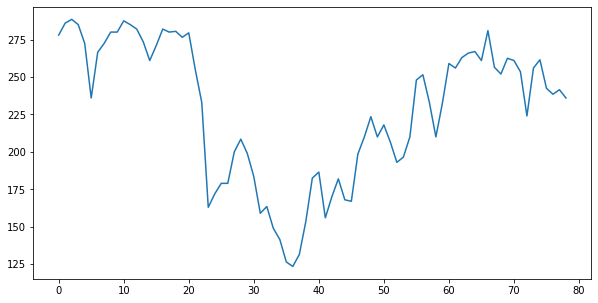

In [15]:
plot(s3)

In [16]:
test_s3_ct = sm_tstat.adfuller(s3, regression='ct', regresults=True)
test_s3_ct[3].__dict__["resols"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.716
Date:                Wed, 20 May 2020   Prob (F-statistic):              0.187
Time:                        02:07:17   Log-Likelihood:                -331.22
No. Observations:                  78   AIC:                             668.4
Df Residuals:                      75   BIC:                             675.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0726      0.042     -1.728      0.088      -0.156       0.011
const         14.5421     10.794      1.347      0.182      -6.961      36.045
x2             0.0370      0.088      0.423      0.673      -0.137       0.211
==============================================================================
Omnibus:                       15.215   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.323
Skew:                          -0.770   Prob(JB):                     8.62e-06
Kurtosis:                       5.192   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### p-value для x3 велико. Тренд не обнаружен. Проверим с параметром regression="c"

In [17]:
test_s3_c = sm_tstat.adfuller(s3, regression='c', regresults=True)
test_s3_c[3].__dict__["resols"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.518
Date:                Wed, 20 May 2020   Prob (F-statistic):             0.0875
Time:                        02:07:17   Log-Likelihood:                -326.54
No. Observations:                  77   AIC:                             659.1
Df Residuals:                      74   BIC:                             666.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0873      0.042     -2.064      0.043      -0.171      -0.003
x2             0.1381      0.114      1.212      0.229      -0.089       0.365
const         19.2475      9.813      1.961      0.054      -0.306      38.801
==============================================================================
Omnibus:                       11.767   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.316
Skew:                          -0.603   Prob(JB):                     0.000174
Kurtosis:                       4.986   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Констатна значима, p-values для const не превышает 0.05. Посмортим на результаты теста Дики-Фуллера

In [18]:
print('Augmented Dickey-Fuller Test Results: ', test_s3_c[0])
print('p-value: ', test_s3_c[1])
print('Critical values: ', test_s3_c[2])

Augmented Dickey-Fuller Test Results:  -2.0640951359815474
p-value:  0.2591949659874118
Critical values:  {'1%': -3.518281134660583, '5%': -2.899878185191432, '10%': -2.5872229937594873}


### Видим, что ряд нестационраен. Придется брать разности

In [19]:
s3_diff = s3.diff(1).dropna()

test_s3_diff_c = sm_tstat.adfuller(s3_diff, regression='c', regresults=True)
test_s3_diff_c[3].__dict__["resols"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     61.63
Date:                Wed, 20 May 2020   Prob (F-statistic):           2.30e-11
Time:                        02:07:17   Log-Likelihood:                -328.69
No. Observations:                  77   AIC:                             661.4
Df Residuals:                      75   BIC:                             666.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9011      0.115     -7.850      0.000      -1.130      -0.672
const         -0.6025      1.997     -0.302      0.764      -4.580       3.375
==============================================================================
Omnibus:                       10.372   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               15.034
Skew:                          -0.526   Prob(JB):                     0.000544
Kurtosis:                       4.892   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Константа не значима (p-value для const > 0.05). Посмотрим на результаты теста при параметре regression="nc"

In [20]:
test_s3_diff_nc = sm_tstat.adfuller(s3_diff, regression='nc', regresults=True)

print('Augmented Dickey-Fuller Test Results: ', test_s3_diff_nc[0])
print('p-value: ', test_s3_diff_nc[1])
print('Critical values: ', test_s3_diff_nc[2])

Augmented Dickey-Fuller Test Results:  -7.892492586792831
p-value:  5.772595743694557e-13
Critical values:  {'1%': -2.5953881025468037, '5%': -1.9449874694709912, '10%': -1.613772841525147}


### Ряд разностей для третьего ряда оказался стационарным

# Определение порядка модели

### Попробуем определить сезонность в данных


АКФ и ЧАКФ для ряда s1


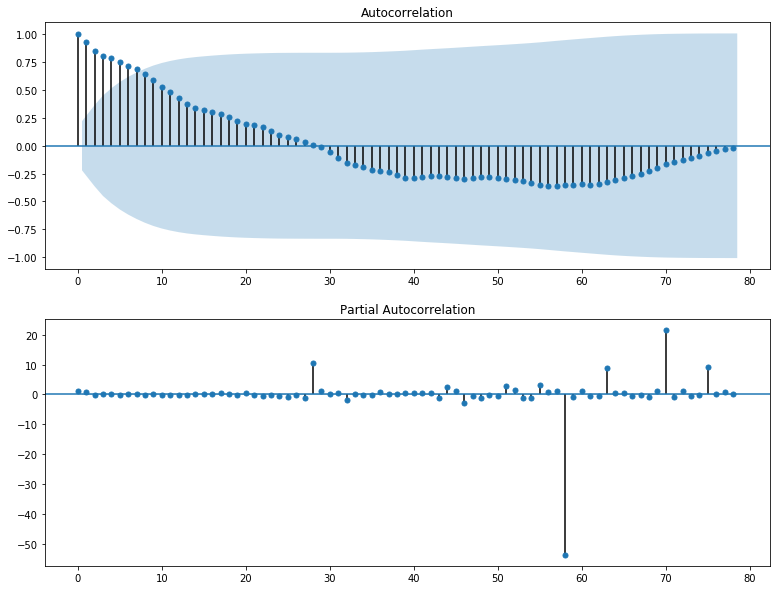

In [21]:
show_lags_s1 = len(s1) - 1
print("\nАКФ и ЧАКФ для ряда s1")
plot_Acorr_PAcorr(s1, show_lags_s1, show_lags_s1)


АКФ и ЧАКФ для ряда s2


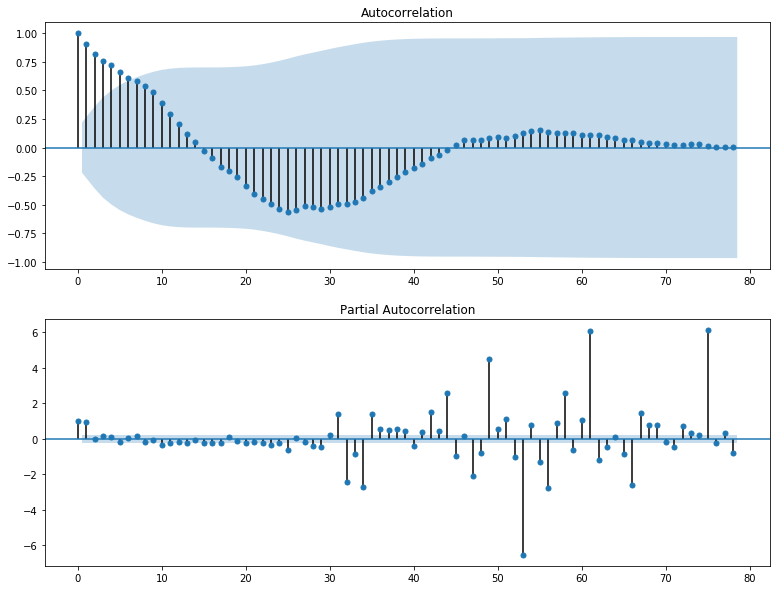

In [22]:
show_lags_s2 = len(s2) - 1
print("\nАКФ и ЧАКФ для ряда s2")
plot_Acorr_PAcorr(s2, show_lags_s2, show_lags_s2)


АКФ и ЧАКФ для ряда s3


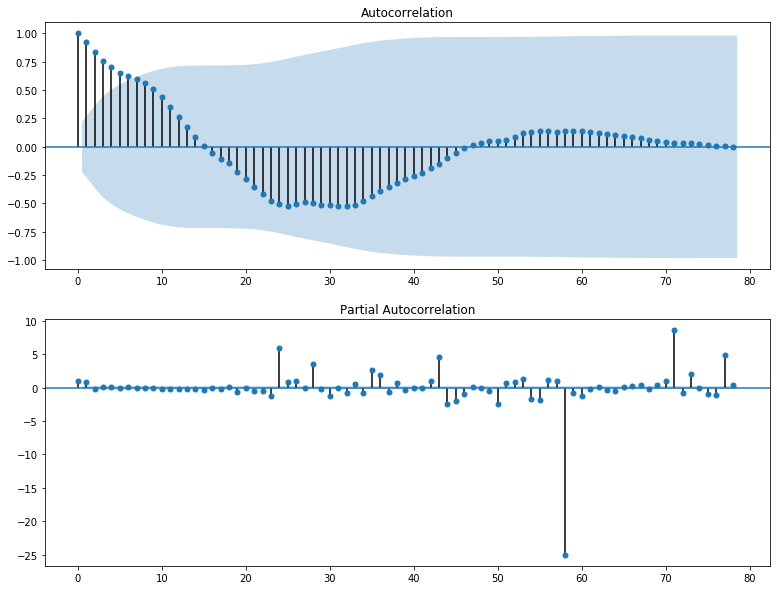

In [23]:
show_lags_s3 = len(s3) - 1
print("\nАКФ и ЧАКФ для ряда s3")
plot_Acorr_PAcorr(s3, show_lags_s3, show_lags_s3)

## Для каждого из рядов были построены АКФ. Ярко выраженной сезонности не обнаружено, к тому же для дальнейшего построения модели VAR необходимо, чтобы порядок сезонности всех рядов был одинаковым. 

### Вывод о том, что порядок сезонности одинаков у рядов s1, s2, s3 не может быть сделан. Следовательно выбираем максимальный лаг по правилу Нерлова.

In [24]:
print(f"Длина ряда s1 = {len(s1)}\nДлина ряда s2 = {len(s2)}\nДлина ряда s3 = {len(s3)}")

Длина ряда s1 = 79
Длина ряда s2 = 79
Длина ряда s3 = 79


### Максимальный лаг будет одинаковым для всех трёх рядов, так как их длина одинакова

In [25]:
max_lag = round(len(s1) ** 0.25)
print("Максимальный лаг:", max_lag)

Максимальный лаг: 3


### Обозначим ряды разностей для рядов s1, s2, s3 как x, y, z соответственно

In [26]:
mdata = pd.DataFrame({"dates":df["dates"], "x":s1_diff, "y":s2_diff, "z":s3_diff}).dropna()
mdata.set_index("dates", inplace=True)

### Построение модели

#### Посмотрим на рекомендованный порядок модели

In [27]:
model = VAR(mdata)
model.select_order(5, trend="nc").summary()

,AIC,BIC,FPE,HQIC
0,24.68,24.96,5.225e+10,24.79
1,24.53,25.09*,4.484e+10,24.75
2,24.66*,25.50,5.127e+10*,24.99*
3,24.78,25.91,5.815e+10,25.23
4,24.89,26.31,6.599e+10,25.46


### Отмечены знаком звездочки " * " минимальные значения информационных критериев. Видно, что третье значение является лучшим по трём из четырех показателей. Это совпадает с выбранным max_lag = 3, полученным по правилу Нерлова.

In [28]:
results = model.fit(max_lag, ic="aic", trend="nc")
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, May, 2020
Time:                     02:07:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    25.0387
Nobs:                     76.0000    HQIC:                   24.7073
Log likelihood:          -1236.01    FPE:                4.31372e+10
AIC:                      24.4867    Det(Omega_mle):     3.43440e+10
--------------------------------------------------------------------
Results for equation x
          coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------
L1.x         0.291270         0.112198            2.596           0.009
L1.y         4.247074         8.123548            0.523           0.601
L1.z        12.531925        10.327535            1.213           0.225
L2.x        -0.423951       

# Оценивание параметров модели. Анализ динамики и взаимосвязей рядов.

## Оценивание и визуализация функции реакции на импульс.

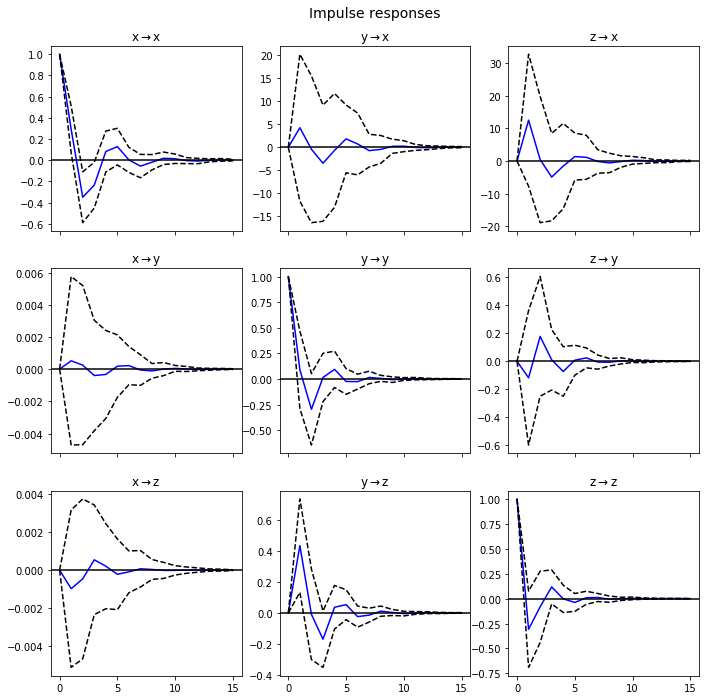

In [29]:
irf = results.irf(15)
irf.plot(orth=False);

### Импульсные отклики приближаются к нулю

## Оценивание кумулятивных эффектов

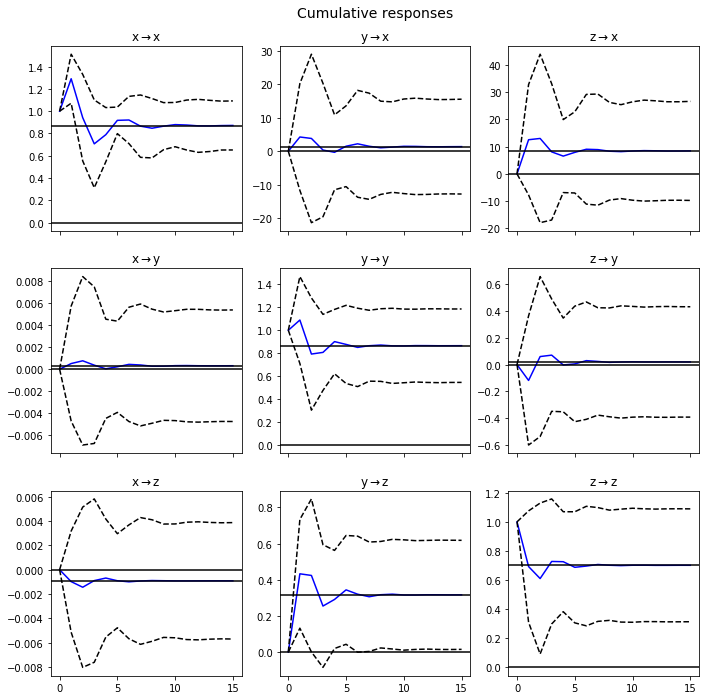

In [30]:
irf.plot_cum_effects(orth=False);

### Накопленные отклики асимптотические по отношению к ненулевой константе

## Декомпозиция дисперсии

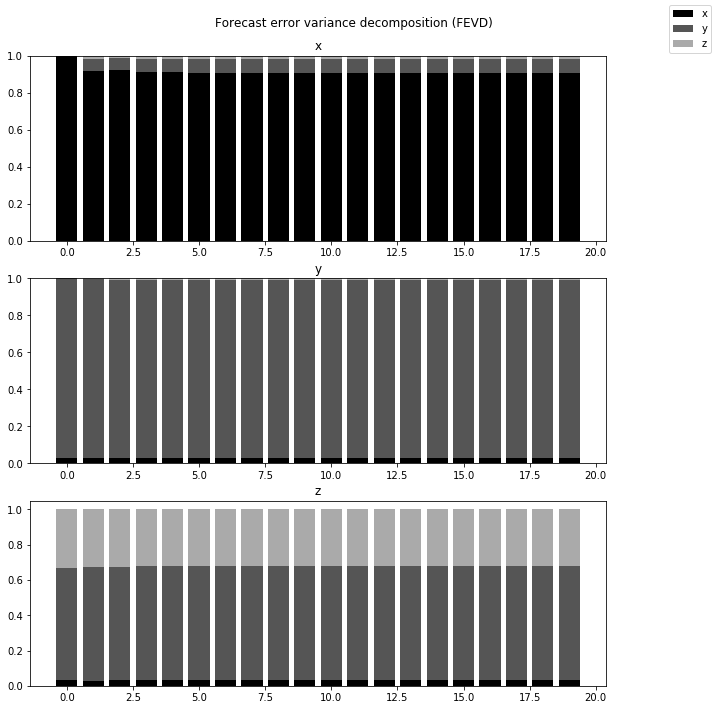

In [31]:
results.fevd(20).plot();

## Тестирование причинности по Грейнджеру

```
Пусть есть два ряда: x1 и x2

Нулевая гипотеза: x2 не является причиной для x1
(то есть прошлые значения x2 не имеют статистически значимого эффекта на текущие значения x1)

Если p-value меньше выбранного уровня значимости, то мы отвергаем нулевую гипотезу


Для того чтобы прийти к заключению, что x2 влияет на x1, нужно чтобы гипотеза x2 не является «причинной по Грейнджеру» для x1 была отвергнута, а гипотеза x1 не является «причинной по Грейнджеру» для x2 была принята.
```


Результаты тестов:

1) С малой ошибкой отвергаем, что y не является «причинной по Грейнджеру» для x.
	Для x-y: p_value=0.04574

Не можем отвергнуть гипотезу, что x не является «причинной по Грейнджеру» для y.
	Для y-x: p_value=0.93765

Делаем вывод, что y причина по Грейнджеру для x




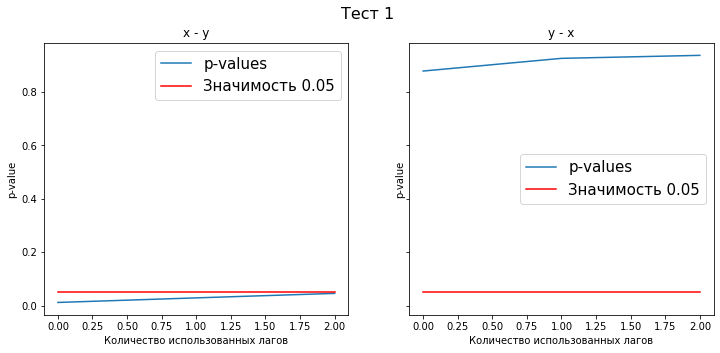


2) С малой ошибкой отвергаем, что z не является «причинной по Грейнджеру» для x.
	Для x-z: p_value=0.03257

Не можем отвергнуть гипотезу, что x не является «причинной по Грейнджеру» для z.
	Для z-x: p_value=0.9708

Делаем вывод, что z причина по Грейнджеру для x




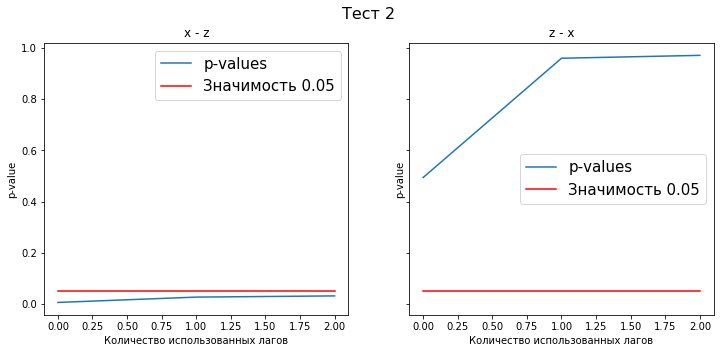


3) С малой ошибкой отвергаем, что y не является «причинной по Грейнджеру» для z.
	Для z-y: p_value=0.03178

Не можем отвергнуть гипотезу, что z не является «причинной по Грейнджеру» для y.
	Для y-z: p_value=0.63943

Делаем вывод, что y причина по Грейнджеру для z




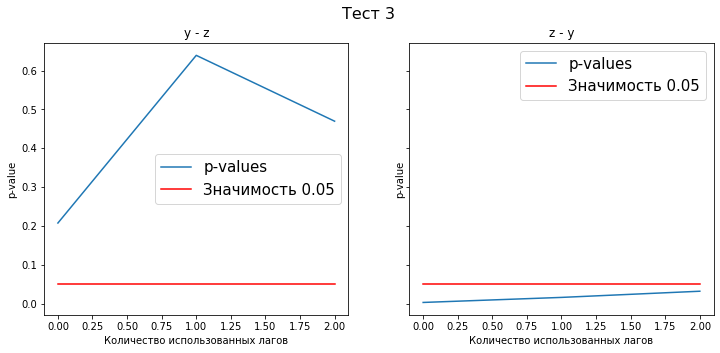

In [32]:
def test_granger_causality(dataframe, names, gc_maxlag=25):
    plotted_pairs = []
    test_number = 0
    
    for i in names:
        for j in names:
            if (i != j) and ([i, j] not in plotted_pairs):
                test_number += 1
                plotted_pairs.append([i, j])
                plotted_pairs.append([j, i])
                fig, ax = plt.subplots(ncols=2, figsize=(12,5), sharey=True)
                fig.suptitle(f"Тест {test_number}", fontsize=16)
                ax = ax.flatten()
                
                
                # tests
                test1 = sm_tstat.grangercausalitytests(dataframe[[i, j]],
                                                       gc_maxlag, verbose=False)
                test2 = sm_tstat.grangercausalitytests(dataframe[[j, i]], 
                                                      gc_maxlag, verbose=False) 
                p_vals1 = []
                p_vals2 = []
                
                for pv in range(1, gc_maxlag+1):
                    p_vals1.append(test1[pv][0]["ssr_chi2test"][1])
                    p_vals2.append(test2[pv][0]["ssr_chi2test"][1])
                
                
                # conclusion
                if max(p_vals1) < 0.05 and max(p_vals2) > 0.05:
                    print(f"\n{test_number}) С малой ошибкой отвергаем, что {j} не является "
                          f"«причинной по Грейнджеру» для {i}.")
                    print(f"\tДля {i}-{j}: p_value={round(max(p_vals1), 5)}\n")
                    print(f"Не можем отвергнуть гипотезу, что {i} не является "
                          f"«причинной по Грейнджеру» для {j}.")
                    print(f"\tДля {j}-{i}: p_value={round(max(p_vals2), 5)}\n")
                    print(f"Делаем вывод, что {j} причина по Грейнджеру для {i}\n\n")
                elif max(p_vals1) > 0.05 and max(p_vals2) < 0.05:
                    print(f"\n{test_number}) С малой ошибкой отвергаем, что {i} не является "
                          f"«причинной по Грейнджеру» для {j}.")
                    print(f"\tДля {j}-{i}: p_value={round(max(p_vals2), 5)}\n")
                    print(f"Не можем отвергнуть гипотезу, что {j} не является "
                          f"«причинной по Грейнджеру» для {i}.")
                    print(f"\tДля {i}-{j}: p_value={round(max(p_vals1), 5)}\n")
                    print(f"Делаем вывод, что {i} причина по Грейнджеру для {j}\n\n")
                
                
                # plot
                ax[0].plot(np.arange(gc_maxlag), p_vals1, label="p-values")
                ax[0].plot(np.arange(gc_maxlag), [0.05] * gc_maxlag, "r-", 
                                    label="Значимость 0.05")
                ax[0].legend(loc="best", fontsize=15)
                ax[0].set_title(f"{i} - {j}")
                ax[0].set_xlabel("Количество использованных лагов")
                ax[0].set_ylabel("p-value")
                
                ax[1].plot(np.arange(gc_maxlag), p_vals2, label="p-values")
                ax[1].plot(np.arange(gc_maxlag), [0.05] * gc_maxlag, "r-", 
                                    label="Значимость 0.05")
                ax[1].legend(loc="best", fontsize=15)
                ax[1].set_title(f"{j} - {i}")
                ax[1].set_xlabel("Количество использованных лагов")
                ax[1].set_ylabel("p-value")
                plt.show()

print("\nРезультаты тестов:")
test_granger_causality(mdata, list(mdata.columns), 3)

# Диагностика модели

## Проверка остатков на отсутствие автокорреляций

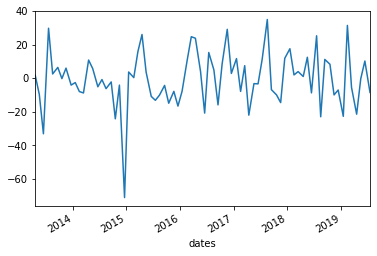

In [33]:
results.resid["z"].plot()

In [34]:
results.test_whiteness(max_lag).summary()

Test statistic,Critical value,p-value,df
7.565,16.92,0.579,9


#### Автокорреляция не обнаружена. Не можем отвергнуть нулевую гипотезу, что автокорреляция нулевая

### Проверка с помощью теста Льюнга-Бокса

In [35]:
lags_num = 10
print("             p-values")
print("LAGS   x         y        z")

for i in range(lags_num):
    p_vals = []
    for j in mdata.columns:
        p_vals.append(acorr_ljungbox(results.resid[j], lags=lags_num)[1][i])
    
    print(f"lag={i}  {round(p_vals[0], 5)}   {round(p_vals[1], 5)}   {round(p_vals[2], 5)}")

             p-values
LAGS   x         y        z
lag=0  0.33786   0.80112   0.98013
lag=1  0.62307   0.94662   0.98793
lag=2  0.31272   0.60618   0.64848
lag=3  0.41189   0.68174   0.71246
lag=4  0.54383   0.79881   0.79793
lag=5  0.64365   0.51462   0.80101
lag=6  0.61269   0.45193   0.83761
lag=7  0.65762   0.55189   0.90091
lag=8  0.73907   0.15487   0.8421
lag=9  0.81286   0.20739   0.87521


### Тест Льюнга-Бокса показывает, что нет ни одного p-value < 0.05, следовательно Нулевая гипотеза об отсутствии автокорреляции не может быть отвергнута. Временные отсчеты статистически независимы

## Проверка нормальности

In [36]:
results.test_normality().summary()

Test statistic,Critical value,p-value,df
19.91,12.59,0.003,6


### Нулевая гипотеза: случайная величина имеет нормальное распределение

### Результат теста: отвергаем Нулевую гипотезу

# Прогнозирование

In [37]:
df_train = pd.DataFrame({"dates":df["dates"], "x":s1, "y":s2, "z":s3}).dropna()
df_test = pd.DataFrame({"dates":df["dates"], "x":s1_test, "y":s2_test, "z":s3_test}).dropna()
df_train.set_index("dates", inplace=True)
df_test.set_index("dates", inplace=True)

In [38]:
lag_order = results.k_ar
forecast = pd.DataFrame(results.forecast(mdata.values[-lag_order:], 3))
forecast.columns = mdata.columns

In [39]:
def invert_transformation(df_train, df_forecast):
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        df_fc[str(col)] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()
    return df_fc

df_forecast = invert_transformation(df_train, forecast)

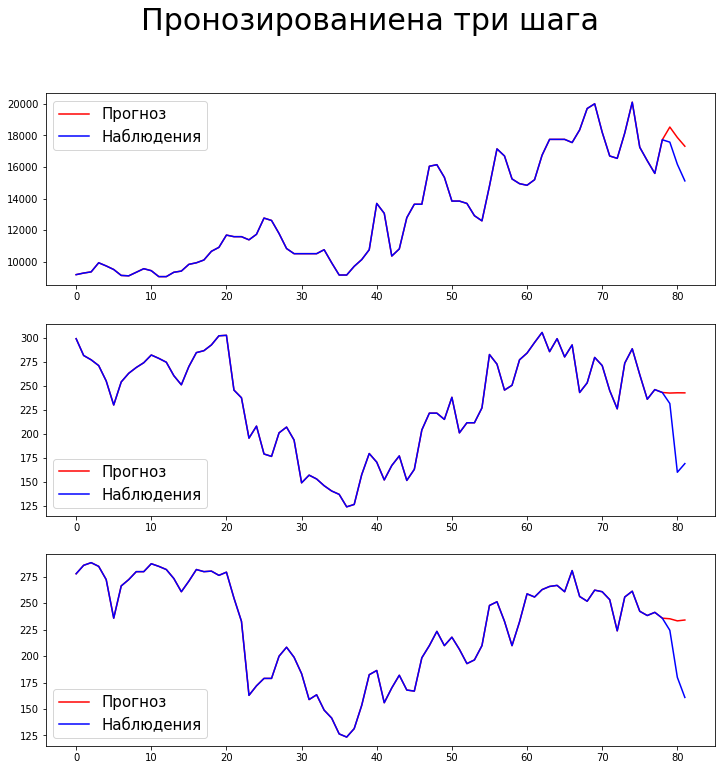

In [40]:
fig,ax = plt.subplots(3, 1, figsize=(12,12))
fig.suptitle("Пронозированиена три шага", fontsize=30)
ax = ax.flatten()

for i, series in enumerate(list(df_train.columns)):
    predict = np.hstack((np.array(df_train[series]), np.array(df_forecast[series])))
    true = np.hstack((np.array(df_train[series]), np.array(df_test[series])))
    
    ax[i].plot(np.arange(len(true)), predict, "r-", label="Прогноз")
    ax[i].plot(np.arange(len(true)), true, "b-", label="Наблюдения")
    ax[i].legend(loc="best", fontsize=15)